In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
houses = pd.read_csv('trains.csv')
holdout_set = pd.read_csv('test.csv')

In [5]:
houses.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
houses.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [15]:
top_10_corrs = houses.corr().sort_values('SalePrice', ascending=False).index[:11].drop('SalePrice')

In [18]:
top_10_corrs

Index(['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars',
       'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add',
       'Full Bath', 'Garage Yr Blt'],
      dtype='object')

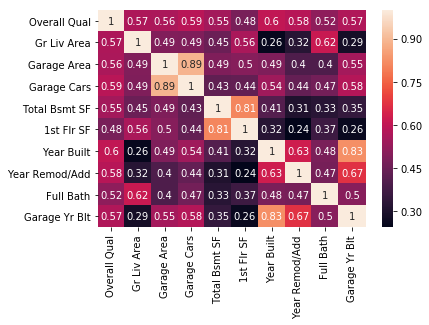

In [16]:
sns.heatmap(houses[top_10_corrs].corr(), annot=True)

In [39]:
houses['SalePrice'].sort_values( ascending= False)

1671    611657
1964    591587
1692    584500
1796    582933
151     556581
1164    555000
623     552000
138     545224
823     538000
1592    535000
81      501837
800     500067
1227    500000
1700    485000
1035    475000
1158    475000
685     468000
1117    466500
41      465000
332     460000
190     457347
934     455000
529     451950
986     450000
509     446261
1647    445000
480     441929
1503    440000
1170    438780
328     430000
         ...  
970      64500
362      64000
1794     64000
114      63900
1394     63000
162      62500
508      62383
1643     61500
1372     61000
1516     60000
432      60000
581      57625
1192     55993
700      55000
1429     55000
1952     52500
1374     52000
2010     51689
410      50138
1301     50000
1089     45000
103      44000
408      40000
1428     39300
1564     37900
1518     35311
1292     35000
1309     34900
183      13100
1628     12789
Name: SalePrice, Length: 2051, dtype: int64

In [4]:
houses.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
                  ... 
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area

In [4]:
features = ['Lot Area']
x= houses [features]
y = houses ['SalePrice']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x,y)

In [6]:
from sklearn.model_selection import cross_val_score

In [7]:
x.isnull().sum()

Lot Area    0
dtype: int64

In [8]:
houses['Street'].value_counts()

Pave    2044
Grvl       7
Name: Street, dtype: int64

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
linereg = LinearRegression()

In [11]:
scores = cross_val_score(linereg, X_train, y_train)
print(scores)
print(scores.mean())

[-0.13374921  0.09082965  0.08557292]
0.01421778416938598


In [12]:
linereg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
linereg.coef_

array([3.48616225])

In [15]:
#X_pred.head()

In [16]:
holdout_set.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [17]:
X_pred = pd.DataFrame(holdout_set['Lot Area'])

In [25]:
y_preds =linereg.predict(X_pred)

y_preds


array([178251.24806749, 180064.05243562, 206008.07187339, 176082.85515023,
       179499.29415171, 152969.59945654, 176068.91050124, 178753.25543098,
       158634.61310696, 181678.14555571, 171393.96692881, 171481.12098497,
       185809.2478177 , 174186.38288818, 187297.83909692, 177965.38276329,
       184031.30507204, 179746.8116712 , 184031.30507204, 207984.7258671 ,
       175127.64669471, 176009.64574305, 174311.88472905, 221169.39148302,
       179865.34118758, 171411.39774004, 190003.10100013, 177756.2130285 ,
       177058.98057922, 158582.32067326, 171969.18369947, 168134.40522842,
       187168.8510938 , 181242.37527491, 185307.24045422, 192412.0391124 ,
       165624.368411  , 177756.2130285 , 177379.70750589, 171902.94661678,
       160154.57984639, 185474.57624205, 172136.51948729, 197135.78895628,
       160513.65455777, 151725.03953458, 185600.07808292, 173572.81833281,
       166837.55287275, 172526.96965889, 179286.63825468, 177756.2130285 ,
       178958.93900351, 1

In [26]:
pd.read_csv('sample_sub_reg.csv', index_col='Id')

,SalePrice
Id,
2,181479.1217
4,181479.1217
6,181479.1217
7,181479.1217
17,181479.1217
18,181479.1217
22,181479.1217
27,181479.1217
31,181479.1217


In [27]:

df= pd.DataFrame()

In [28]:
myids= holdout_set['Id']

In [29]:
df['Id']=myids

In [30]:
df.head()

,Id
0,2658
1,2718
2,2414
3,1989
4,625


In [32]:
df['SalePrice']=y_preds

In [33]:
df

,Id,SalePrice
0,2658,178251.248067
1,2718,180064.052436
2,2414,206008.071873
3,1989,176082.855150
4,625,179499.294152
5,333,152969.599457
6,1327,176068.910501
7,858,178753.255431
8,95,158634.613107
9,1568,181678.145556


In [35]:
df.set_index('Id', inplace= True)

In [36]:
df.to_csv('./my_preds.csv')

In [37]:
%pwd

'/Users/marcbirbach/dsi5/week1/project-2'